# Parsing 4000 Rigol Waveforms

**Scott Prahl**

**Feb 2020**

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

try:
    import RigolWFM.wfm as rigol

except:
    print("***** You need to install the module to read Rigol files first *****")
    print("***** Execute the following line in a new cell, then retry     *****")
    print()
    print("!{sys.executable} -m pip install RigolWFM")

## Introduction

This notebook illustrates shows how to extract signals from a `.wfm` file created by a the Rigol DS4000 scope.  It also validates that the process works by comparing with `.csv` and screenshots.

Two different `.wfm` files are examined one for the DS4022 scope and one for the DS4024 scope.  The accompanying `.csv` files seem to have t=0 in the zero in the center of the waveform. 

The list of Rigol scopes that should produce the same file format are:

In [2]:
print(rigol.DS4000_scopes[3:])

['DS4054', 'DS4052', 'DS4034', 'DS4032', 'DS4024', 'DS4022', 'DS4014', 'DS4012', 'MSO4054', 'MSO4052', 'MSO4034', 'MSO4032', 'MSO4024', 'MSO4022', 'MSO4014', 'MSO4012']


## DS4022 Waveform

### Look at a screen shot

Start with a `.wfm` file from a Rigol DS4022 scope.  It should looks something like this

<img src="https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS4022-A.png" width="70%">

### Look at the data in the `.csv` file

First let's look at plot of the data from the corresponding `.csv` file. 

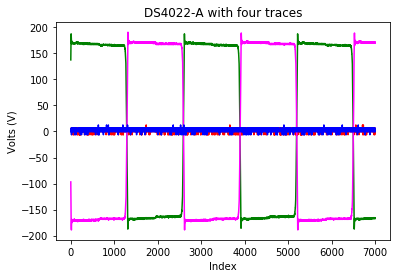

In [3]:
csv_filename = "https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS4022-A.csv"

csv_data = np.genfromtxt(csv_filename, delimiter=',', skip_header=2).T

plt.plot(csv_data[1], color='green')
plt.plot(csv_data[2], color='red')
plt.plot(csv_data[3], color='magenta')
plt.plot(csv_data[4], color='blue')

plt.xlabel("Index")
plt.ylabel("Volts (V)")
plt.title("DS4022-A with four traces")
plt.show()

### Now for the `.wfm` data

First a textual description.

In [4]:
# raw=true is needed because this is a binary file
wfm_filename = "https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS4022-A.wfm" + "?raw=true"  

w = rigol.Wfm.from_url(wfm_filename, '4000')

description = w.describe()
print(description)

downloading 'https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS4022-A.wfm?raw=true'
    General:
        File Model   = wfm4000
        User Model   = 4000
        Parser Model = wfm4000
        Firmware     = unknown
        Filename     = DS4022-A.wfm
        Channels     = [1, 2, 3, 4]

     Channel 1:
         Coupling =       DC
            Scale =    50.00  V/div
           Offset =     0.00  V
            Probe =      10X

        Time Base =    1.000 µs/div
           Offset =  500.000 ns
            Delta =    2.000 ns/point
           Points =     7000

         Count    = [        1,        2,        3  ...      6999,     7000]
           Raw    = [      215,      222,      227  ...        20,       20]
           Times  = [-6.500 µs,-6.498 µs,-6.496 µs  ...  7.498 µs, 7.500 µs]
           Volts  = [-137.50  V,-148.44  V,-156.25  V  ... 167.19  V,167.19  V]

     Channel 2:
         Coupling =       DC
            Scale =   200.00  V/div
           Offset =     0.00  V

Now for the actual signal

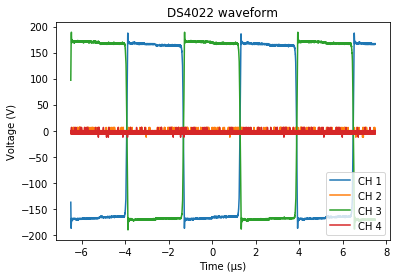

In [5]:
for ch in w.channels:
    name = 'CH %d'%ch.channel_number
    plt.plot(ch.times*1e6, ch.volts, label=name)

plt.xlabel("Time (µs)")
plt.ylabel("Voltage (V)")

plt.title("DS4022 waveform")
plt.legend()
plt.show()

## DS4024 Waveform

### Start with plotting the `.csv` data

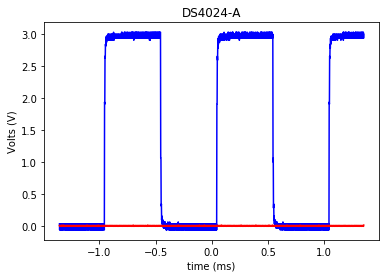

In [6]:
csv_filename = "https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS4024-A.csv"

csv_data = np.genfromtxt(csv_filename, delimiter=',', skip_header=2).T
time = csv_data[0] * 2.000000e-06 - 1.400000e-03

plt.plot(time*1000,csv_data[1], color='blue')
plt.plot(time*1000,csv_data[2], color='red')

plt.xlabel("time (ms)")
plt.ylabel("Volts (V)")
plt.title("DS4024-A")
plt.show()

### Now plot the `.wfm` data

In [7]:
# raw=true is needed because this is a binary file
wfm_filename = "https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS4024-A.wfm" + "?raw=true"  

w = rigol.Wfm.from_url(wfm_filename, '4000')

description = w.describe()
print(description)

downloading 'https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS4024-A.wfm?raw=true'
    General:
        File Model   = wfm4000
        User Model   = 4000
        Parser Model = wfm4000
        Firmware     = unknown
        Filename     = DS4024-A.wfm
        Channels     = [1, 2]

     Channel 1:
         Coupling =       DC
            Scale =     1.00  V/div
           Offset =  -576.00 mV
            Probe =       1X

        Time Base =  200.000 µs/div
           Offset =  100.000 µs
            Delta =    4.000 ns/point
           Points =   700000

         Count    = [        1,        2,        3  ...    699999,   700000]
           Raw    = [      109,      109,      109  ...       205,      206]
           Times  = [-1.300 ms,-1.300 ms,-1.300 ms  ...  1.500 ms, 1.500 ms]
           Volts  = [  1.14  V,  1.14  V,  1.14  V  ...  -1.86  V, -1.89  V]

     Channel 2:
         Coupling =       DC
            Scale =   200.00 mV/div
           Offset =     0.00  V
        

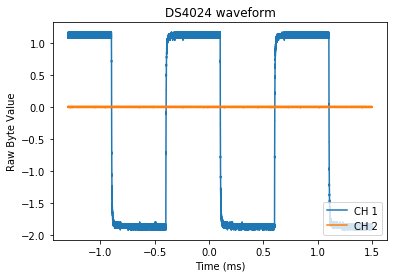

In [8]:
for ch in w.channels:
    name = 'CH %d'%ch.channel_number
    plt.plot(ch.times*1e3, ch.volts, label=name)

plt.xlabel("Time (ms)")
plt.ylabel("Raw Byte Value")

plt.title("DS4024 waveform")
plt.legend(loc="lower right")
plt.show()